In [8]:
# Import all required libraries
import os
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Download necessary NLTK data (only first time)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)


True

In [10]:
documents = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is a part of machine learning.",
    "Natural language processing helps computers understand text.",
    "Quantum computing is a new field of research.",
    "AI and ML are revolutionizing technology."
]


In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    tokens = text.split()
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

cleaned_docs = [preprocess(doc) for doc in documents]

for i, doc in enumerate(cleaned_docs):
    print(f"Cleaned Document {i}:", doc, "\n")


Cleaned Document 0: machine learning subset artificial intelligence 

Cleaned Document 1: deep learning part machine learning 

Cleaned Document 2: natural language processing help computer understand text 

Cleaned Document 3: quantum computing new field research 

Cleaned Document 4: ai ml revolutionizing technology 



In [12]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_docs)

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (5, 23)


In [13]:
similarity_matrix = cosine_similarity(tfidf_matrix)
print("Cosine Similarity Matrix:\n", similarity_matrix)


Cosine Similarity Matrix:
 [[1.        0.4107244 0.        0.        0.       ]
 [0.4107244 1.        0.        0.        0.       ]
 [0.        0.        1.        0.        0.       ]
 [0.        0.        0.        1.        0.       ]
 [0.        0.        0.        0.        1.       ]]


In [14]:
pairs = []
n = len(documents)

# Compare every pair of documents
for i in range(n):
    for j in range(i+1, n):
        pairs.append(((i, j), similarity_matrix[i][j]))

# Sort by similarity score (descending)
sorted_pairs = sorted(pairs, key=lambda x: x[1], reverse=True)

print("\nTop 3 Most Similar Document Pairs:\n")
for pair, score in sorted_pairs[:3]:
    print(f"Documents {pair[0]} and {pair[1]} → Similarity: {score:.3f}")



Top 3 Most Similar Document Pairs:

Documents 0 and 1 → Similarity: 0.411
Documents 0 and 2 → Similarity: 0.000
Documents 0 and 3 → Similarity: 0.000


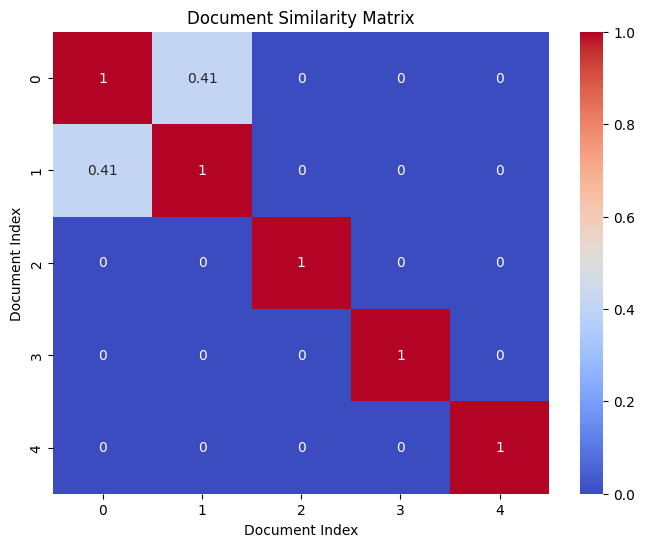

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm')
plt.title("Document Similarity Matrix")
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.show()
